In [1]:
# 범주형 - 수치형 구조에 대한 데이터 분석

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder


print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)

font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [4]:
accident = pd.read_csv('data.csv')

In [5]:
accident.rename(columns={'가해운전자 상해정도': '가해운전자_상해정도'}, inplace=True)

In [6]:
X = accident.drop('가해운전자_상해정도', axis=1)
y = accident['가해운전자_상해정도']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. 데이터 분할 (학습용, 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 데이터 스케일링 (KNN은 거리기반 모델이므로 스케일링 필수)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=5)  # K=5 설정 (기본값)
knn.fit(X_train_scaled, y_train)

# 5. 예측
y_pred = knn.predict(X_test_scaled)

# 6. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 7. 분류 보고서 (정밀도, 재현율 등)
print(classification_report(y_test, y_pred))


Accuracy: 0.9484
              precision    recall  f1-score   support

          경상       0.81      0.74      0.77       227
        부상신고       0.57      0.59      0.58       160
          사망       0.00      0.00      0.00        16
        상해없음       0.97      0.99      0.98      4252
          중상       0.84      0.46      0.60       155

    accuracy                           0.95      4810
   macro avg       0.64      0.56      0.59      4810
weighted avg       0.94      0.95      0.94      4810



In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print(f'Best n_neighbors: {grid_search.best_params_["n_neighbors"]}')


Best n_neighbors: 5


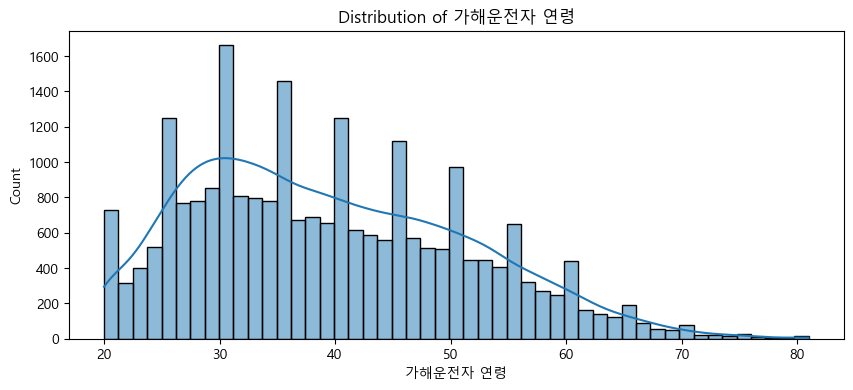

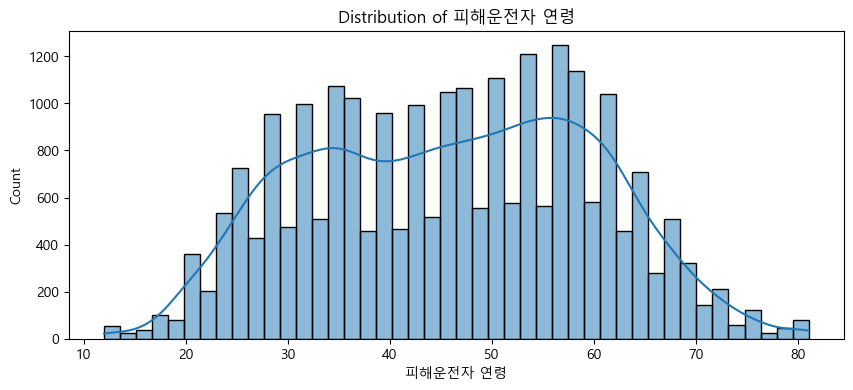

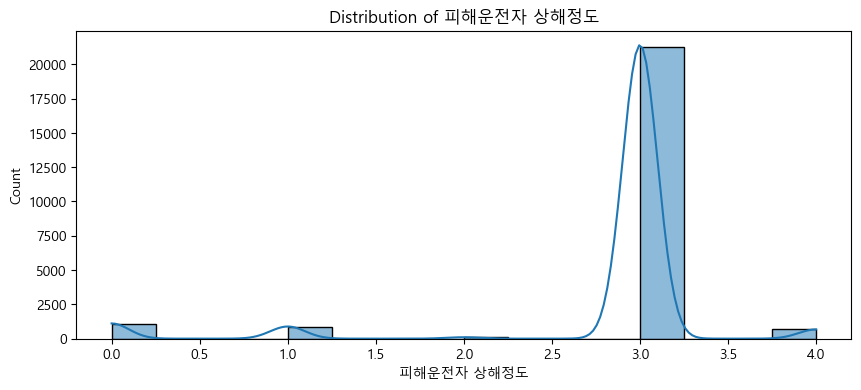

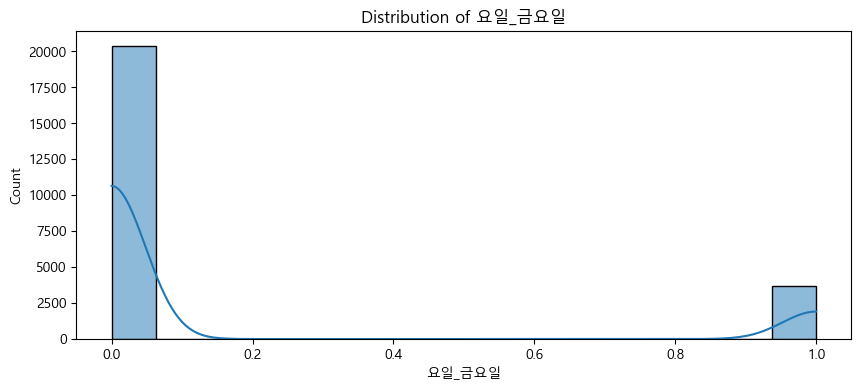

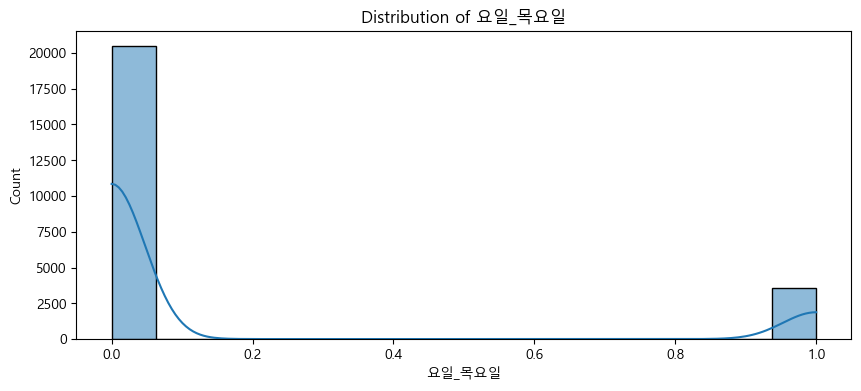

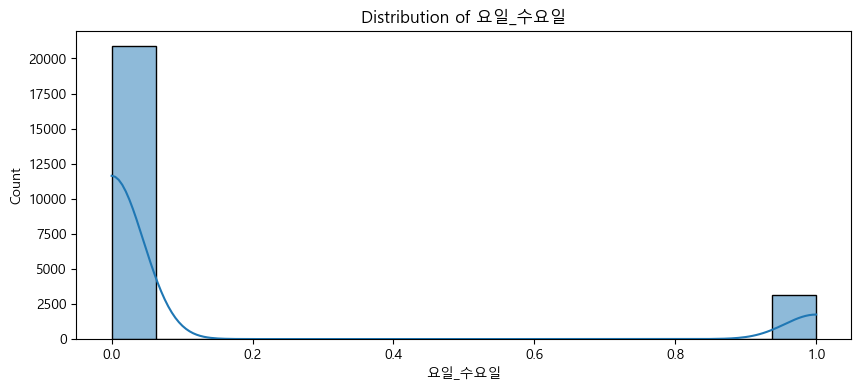

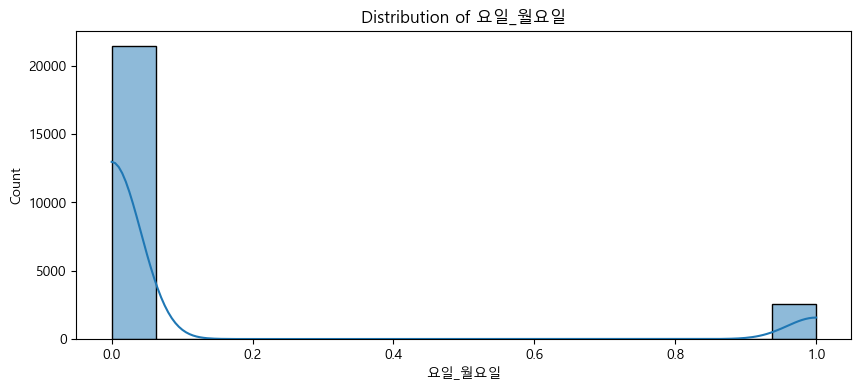

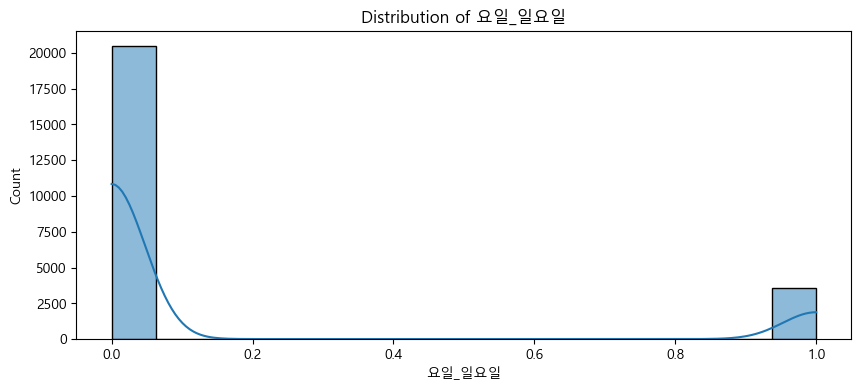

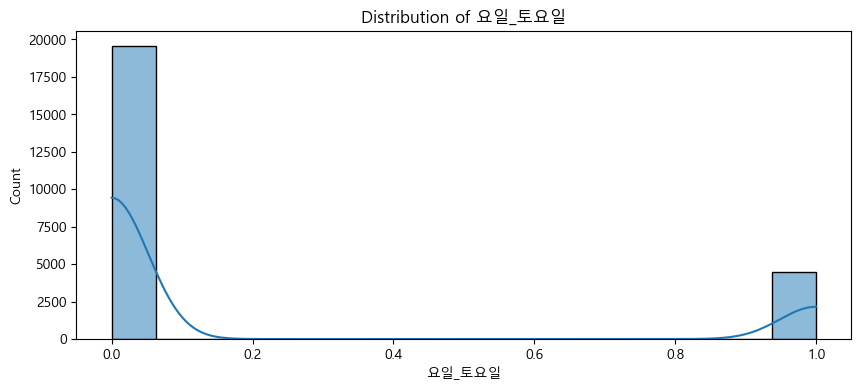

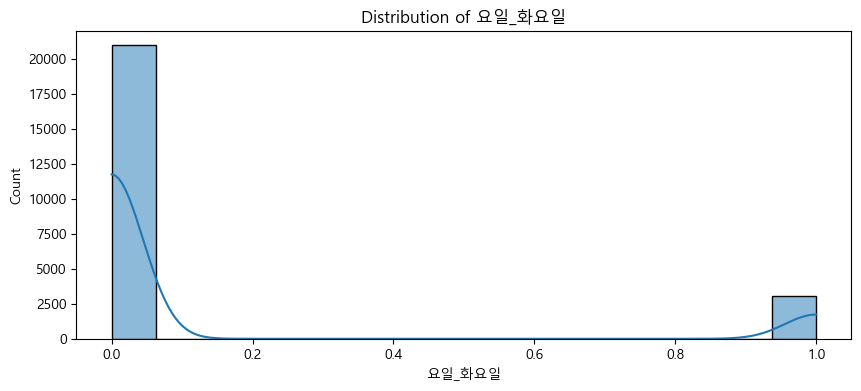

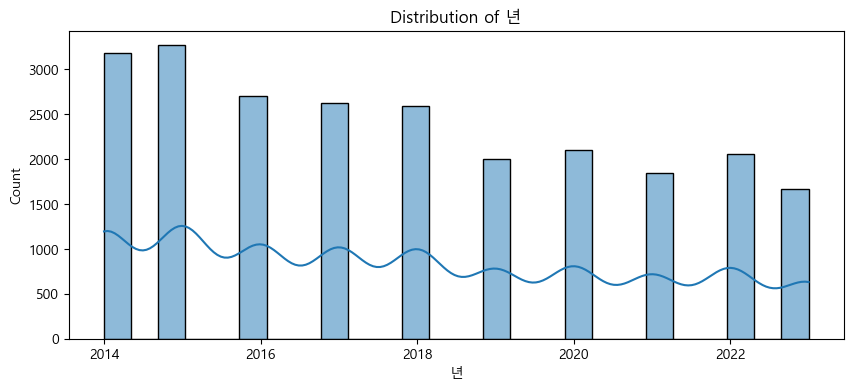

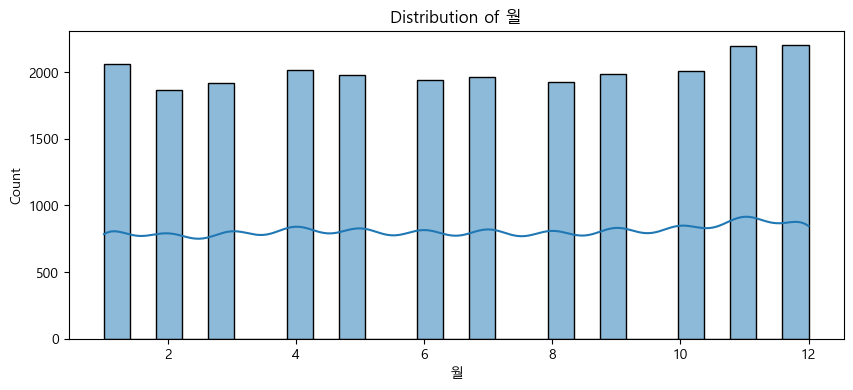

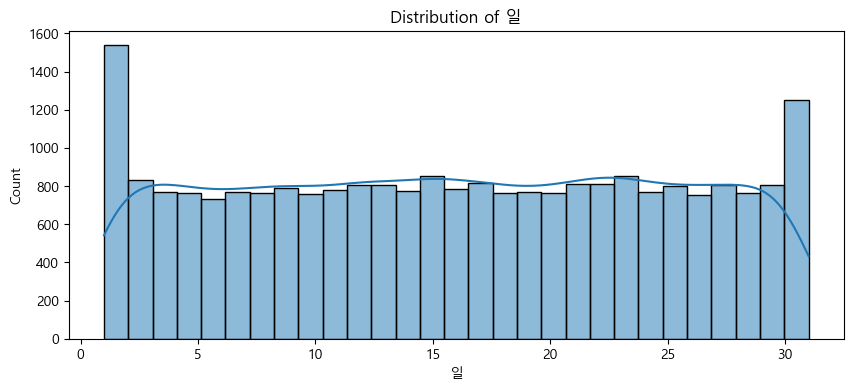

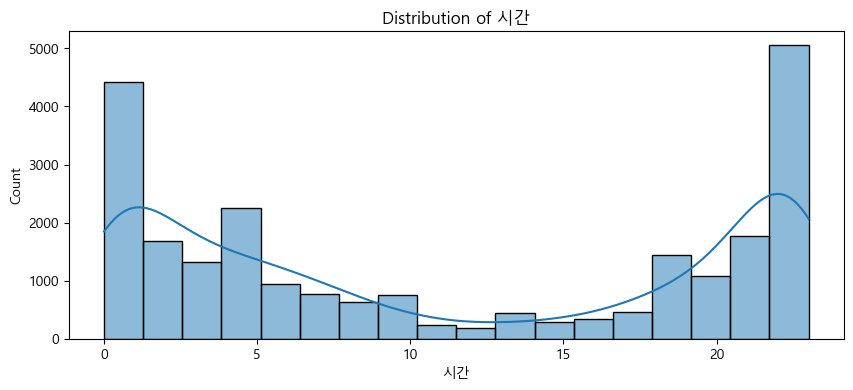

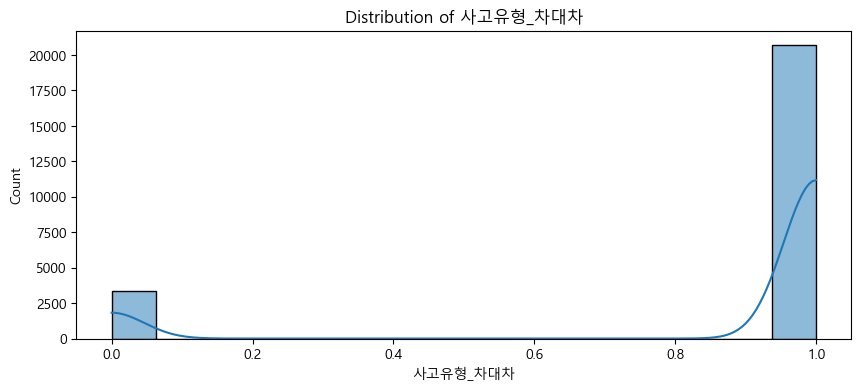

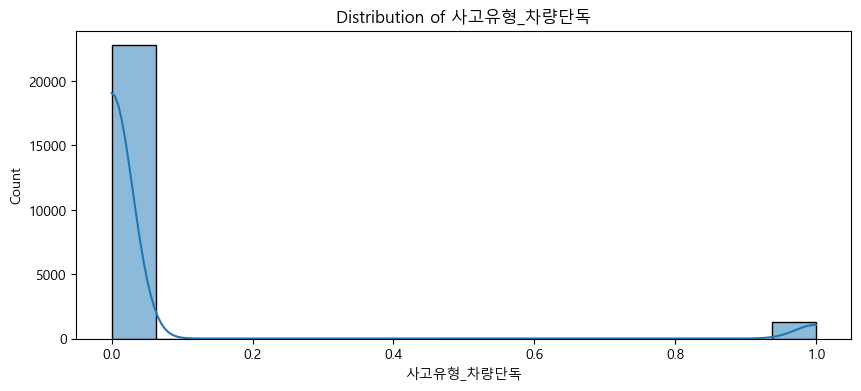

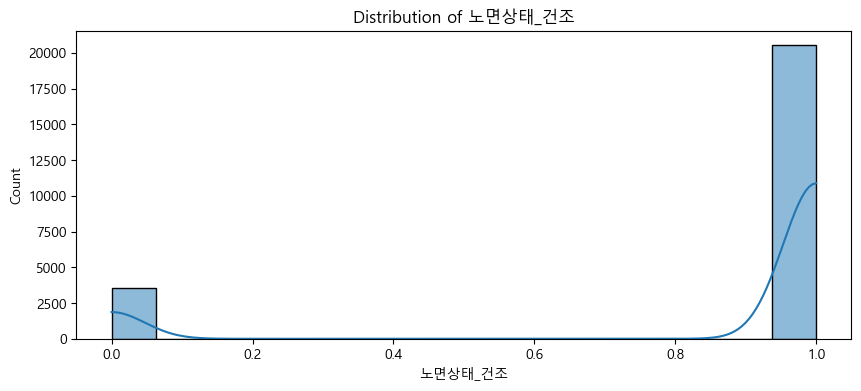

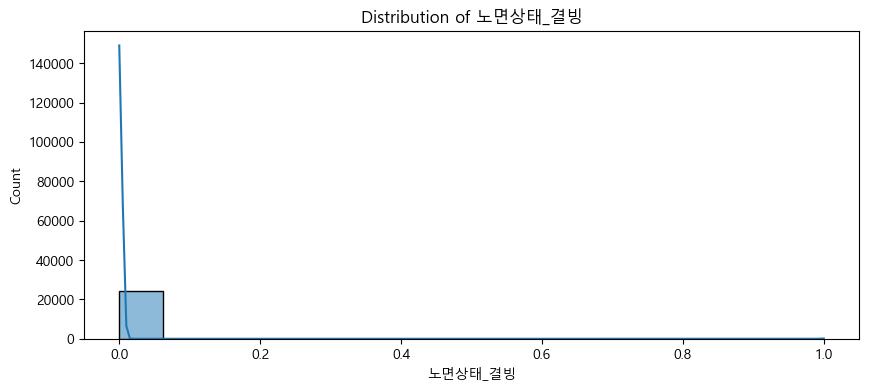

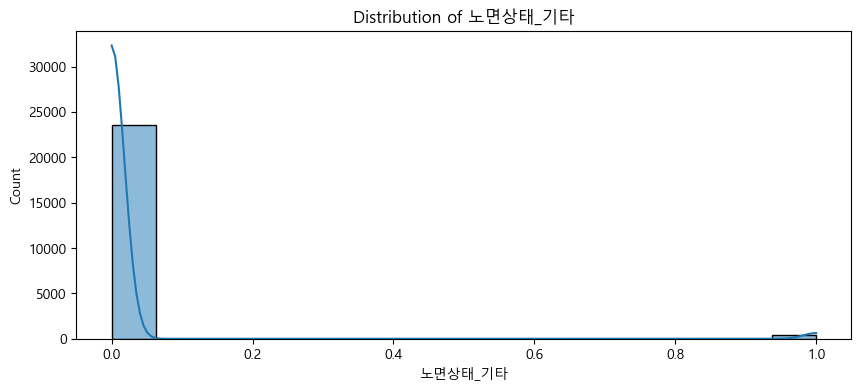

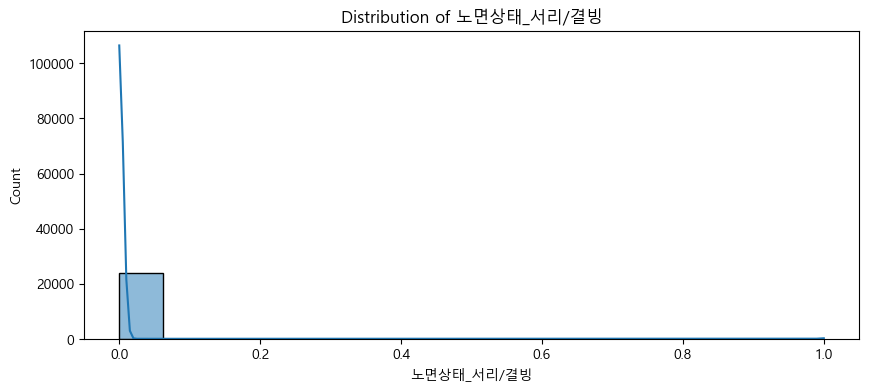

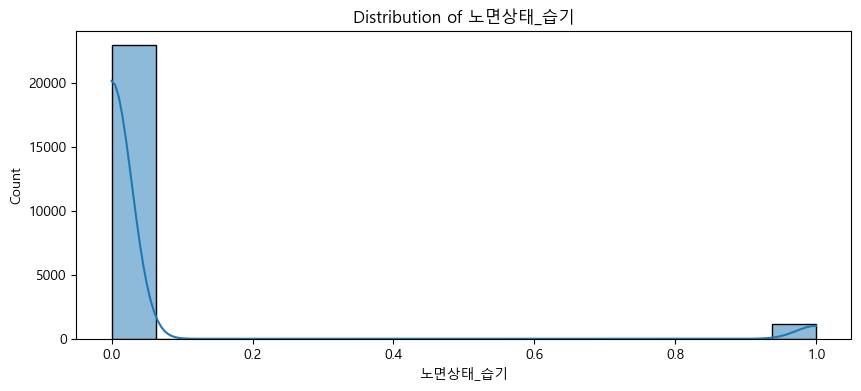

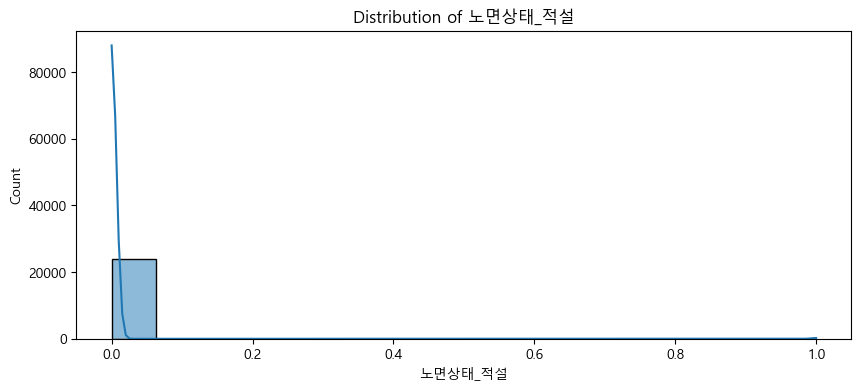

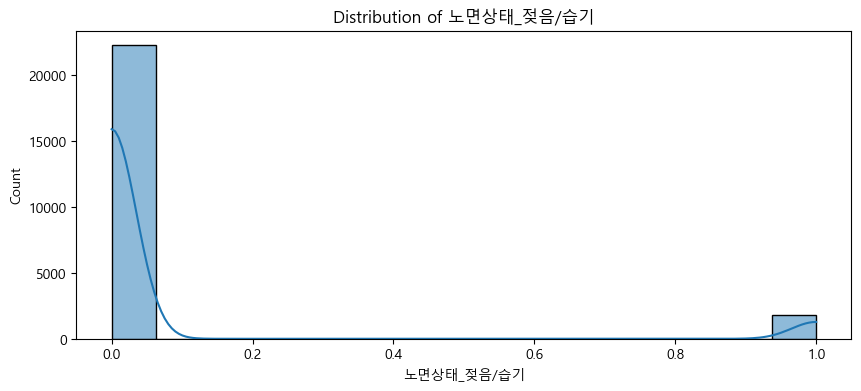

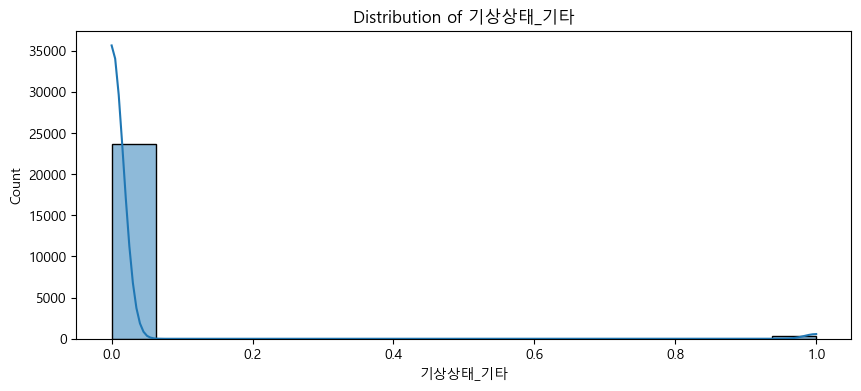

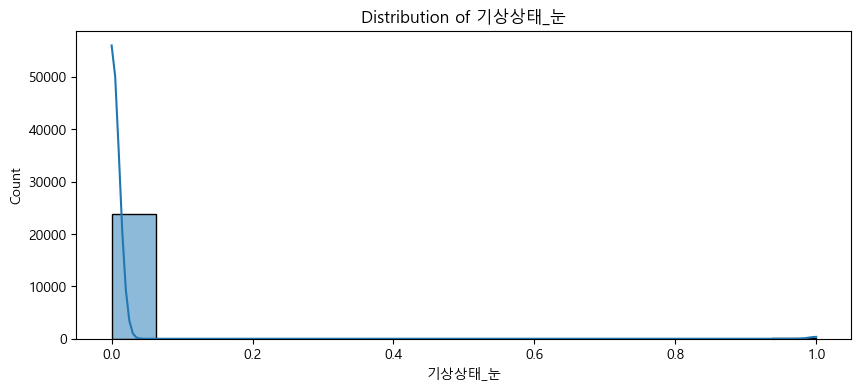

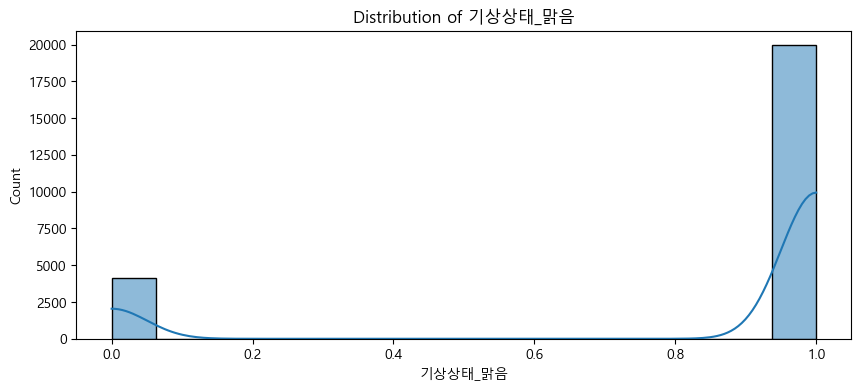

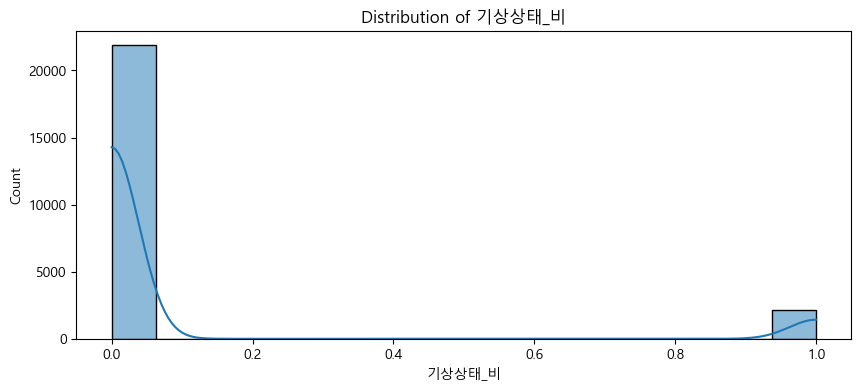

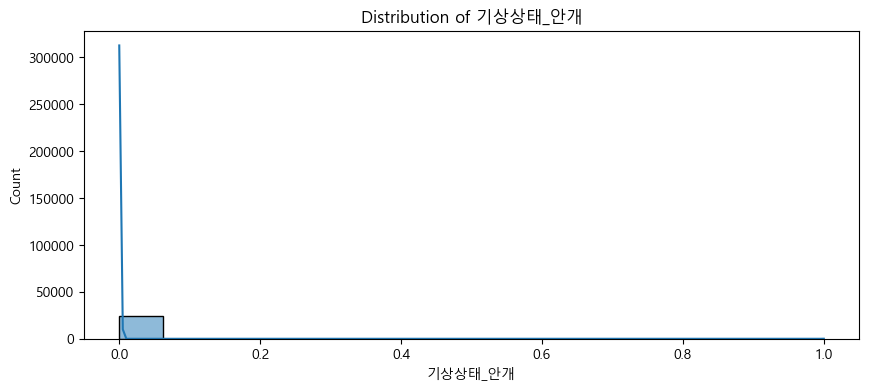

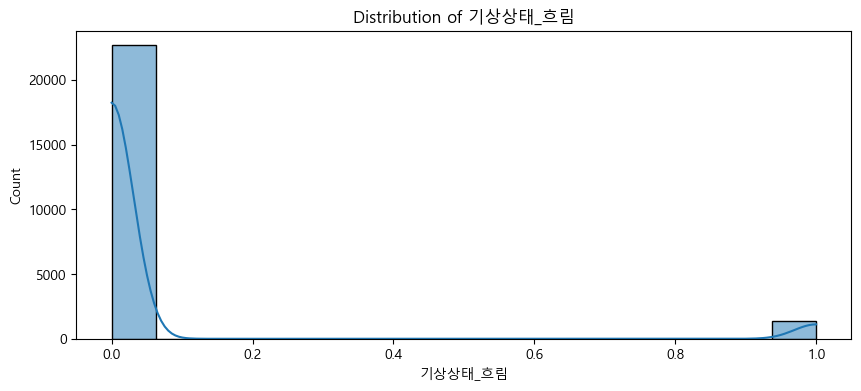

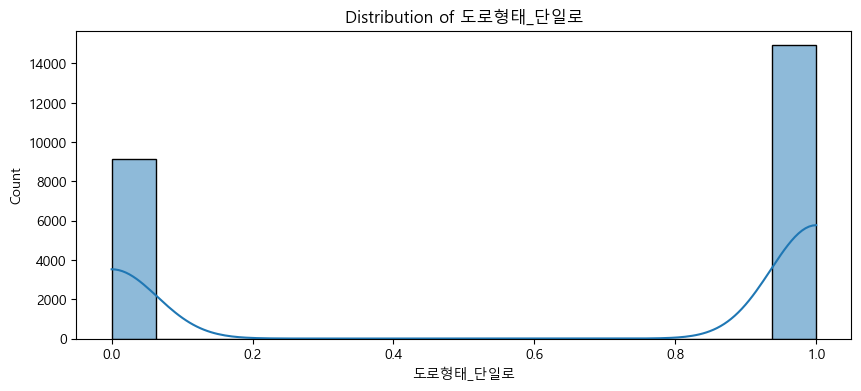

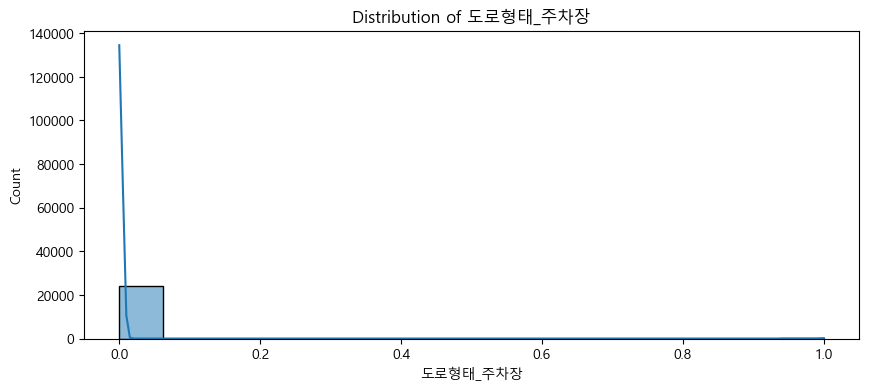

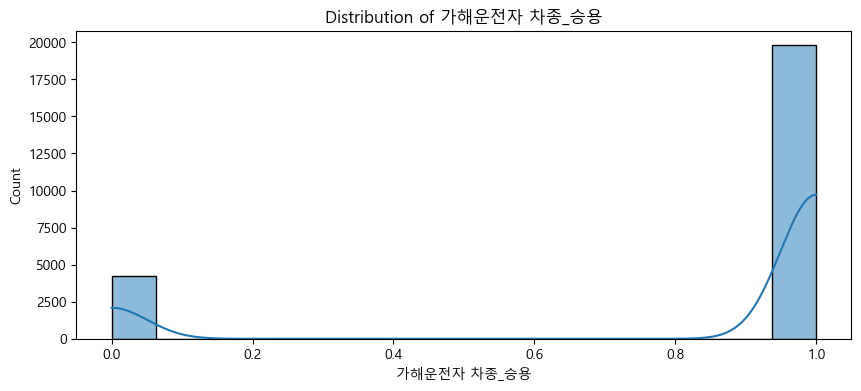

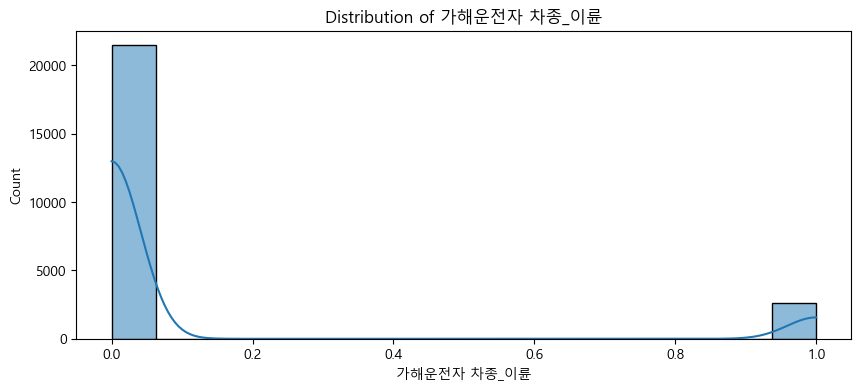

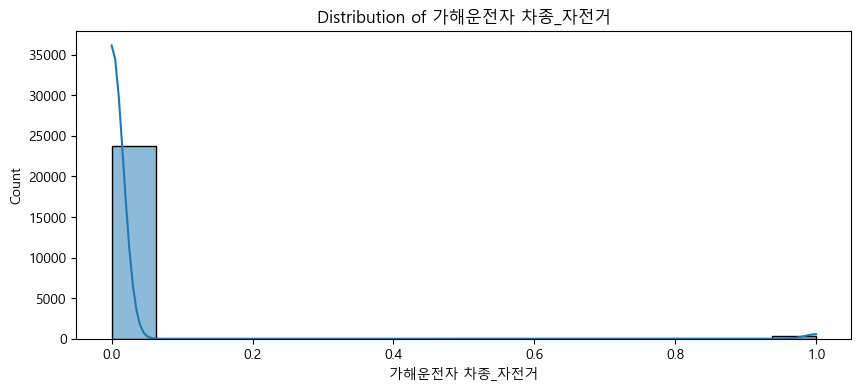

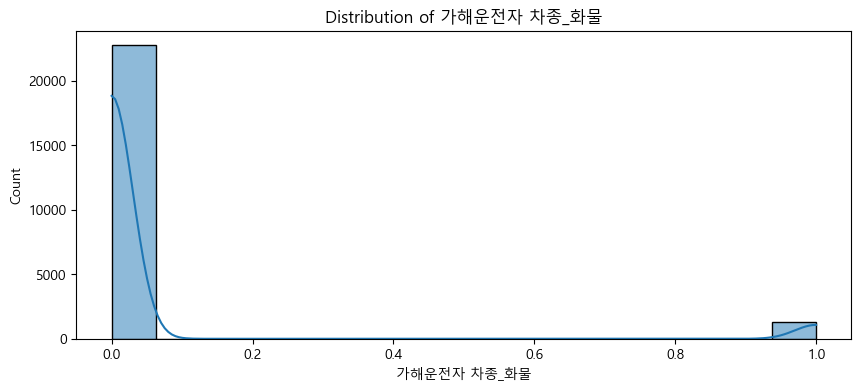

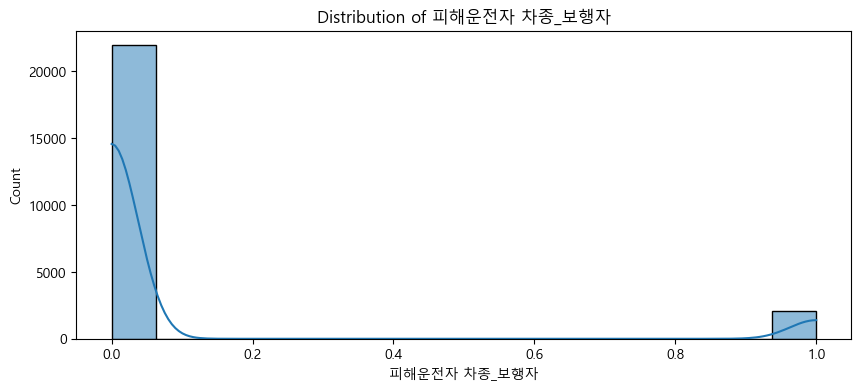

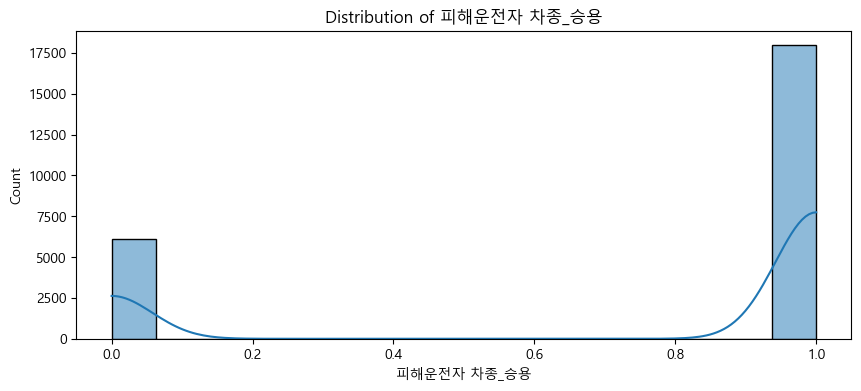

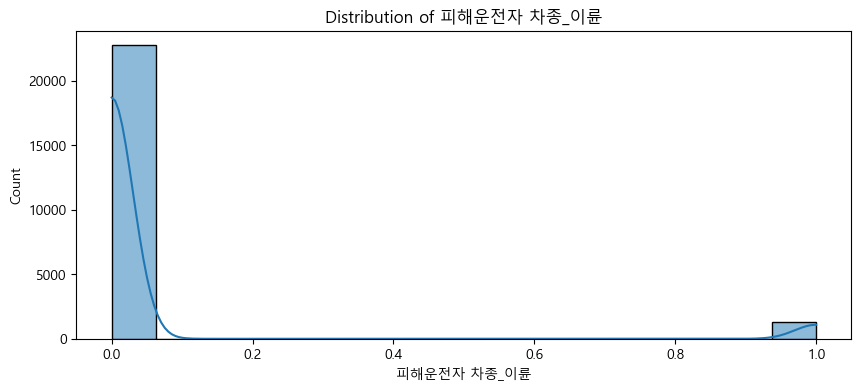

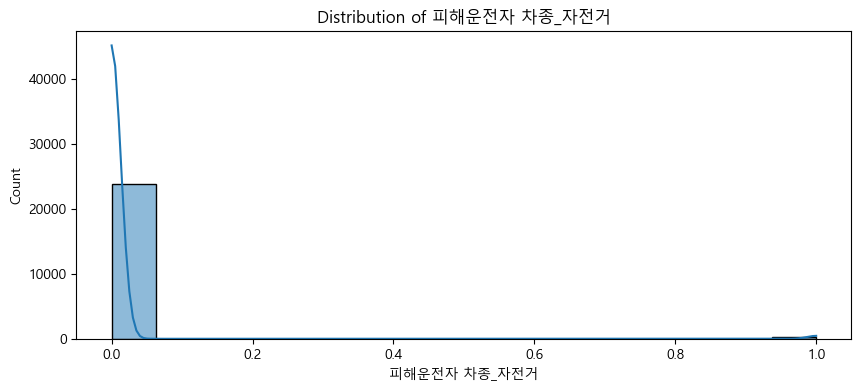

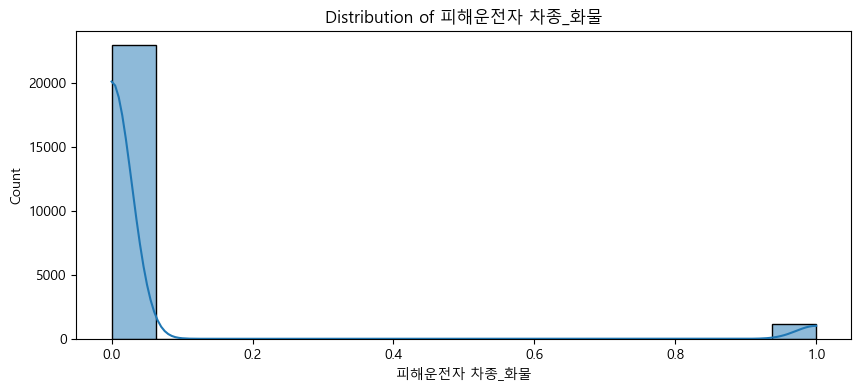

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특성의 분포 시각화
def plot_feature_distributions(X):
    for column in X.columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(X[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

plot_feature_distributions(X)


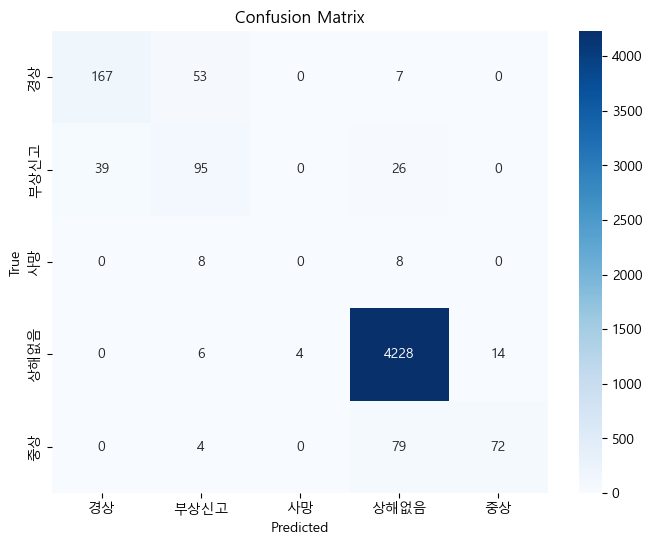

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 시각화
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=sorted(y_true.unique()), 
                yticklabels=sorted(y_true.unique()))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)
